In [42]:
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
basedir = os.path.dirname(os.path.abspath(''))
sourcedir = os.path.join(basedir, 'source')
import sys
sys.path.insert(0, sourcedir)
from mcmc import MCMC

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

datadir = os.path.join(basedir, 'data')

binned_data_file = os.path.join(datadir, 'lcparam_DS17f.txt')
binned_sys_file = os.path.join(datadir, 'sys_DS17f.txt')

    # The for loop is to allow for the option of plotting multiple chains on the same chart
    # (It just kinda looks cool)
print(f"Starting Markov Chain")
start = [np.random.uniform(0, 1), np.random.uniform(0,1), np.random.uniform(50,100), np.random.uniform(-25, -15)]
    #start = [.25, .74, 68]
g_cov_test = np.diag([.01, .01, .1, .01])
markov_chain = MCMC(initial_state=start,
                    data_file=binned_data_file,
                    systematics_file=binned_sys_file, 
                    g_cov=g_cov_test)

markov_chain.make_chain(10000)

print(markov_chain._chain)


Starting Markov Chain
[[  0.86362807   0.8209337   68.138859   -22.41821966]
 [  0.86362807   0.8209337   68.138859   -22.41821966]
 [  0.87288748   0.86291249  68.69661147 -22.31532349]
 ...
 [  0.46190911   0.86202334  84.48153368 -18.98497627]
 [  0.46190911   0.86202334  84.48153368 -18.98497627]
 [  0.46190911   0.86202334  84.48153368 -18.98497627]]


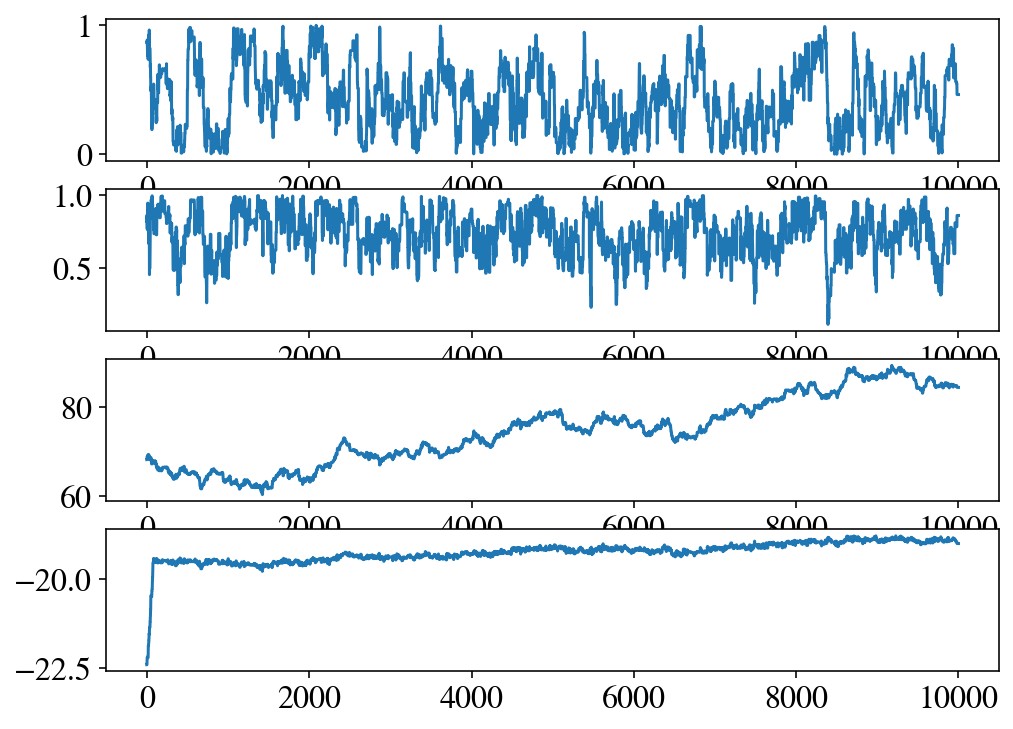

In [43]:
fig, ax = plt.subplots(4,1)
ax[0].plot(markov_chain.chain[:,0])
ax[1].plot(markov_chain.chain[:,1])
ax[2].plot(markov_chain.chain[:,2])
ax[3].plot(markov_chain.chain[:,3])
plt.show()

In [44]:
cov = np.cov(markov_chain.chain.T)
alpha= .1
cov*=alpha
print(cov)

[[ 5.97068851e-03  2.37022708e-03 -2.98691300e-02 -1.18677324e-03]
 [ 2.37022708e-03  2.31379125e-03 -1.50484114e-02 -8.40994228e-04]
 [-2.98691300e-02 -1.50484114e-02  5.83016539e+00  1.77560566e-01]
 [-1.18677324e-03 -8.40994228e-04  1.77560566e-01  8.49320509e-03]]


In [45]:
start = [np.random.uniform(0, 1), np.random.uniform(0,1), np.random.uniform(50,100), np.random.uniform(-25, -15)]
    #start = [.25, .74, 68]
markov_chain2 = MCMC(initial_state=start,
                    data_file=binned_data_file,
                    systematics_file=binned_sys_file, 
                    g_cov=cov)

markov_chain2.make_chain(10000)

/Users/gabe/classes/data_discovery/250_project_group_2/source/mcmc.py:152: RuntimeWarning: overflow encountered in exp
  return np.min([1., np.exp(diff)]), new_log_likelihood


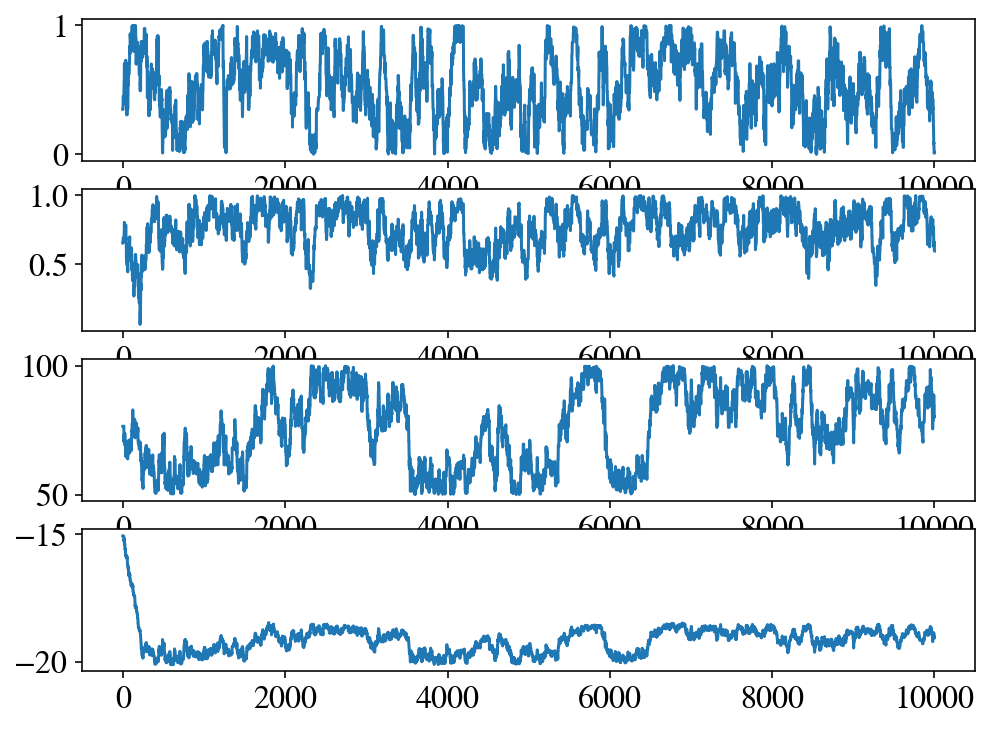

In [46]:
fig, ax = plt.subplots(4,1)
ax[0].plot(markov_chain2.chain[:,0])
ax[1].plot(markov_chain2.chain[:,1])
ax[2].plot(markov_chain2.chain[:,2])
ax[3].plot(markov_chain2.chain[:,3])
plt.show()

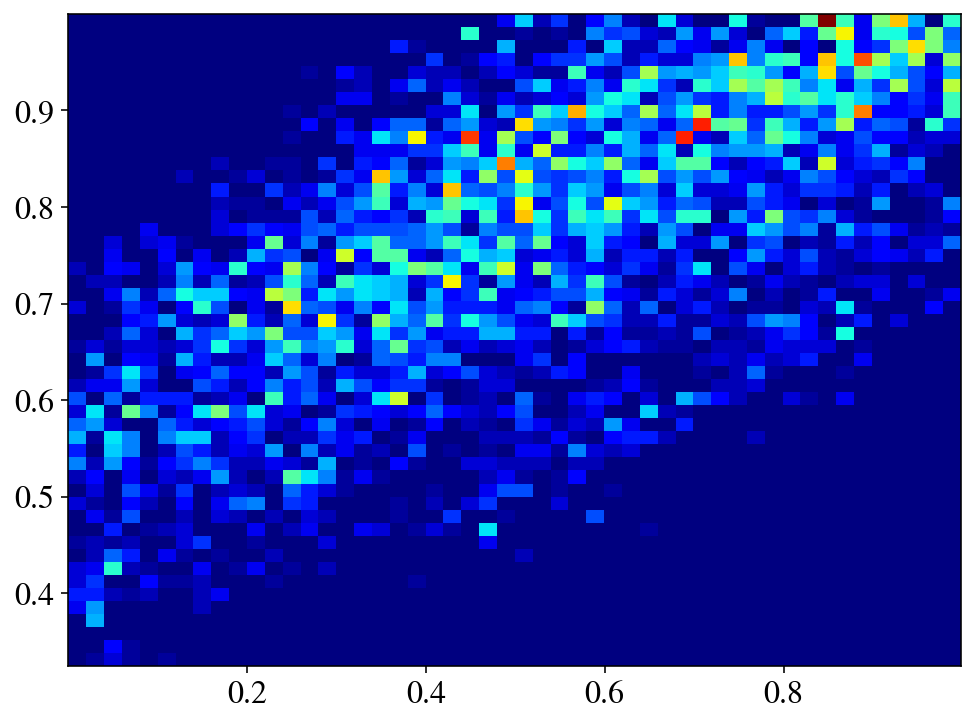

In [47]:

plt.hist2d(markov_chain2.chain[500:,0], markov_chain2.chain[500:,1], bins=(50, 50), cmap=plt.cm.jet)
plt.show()